# TOI-469: Multiplanet system with LC and RV

We will analyse the photometry and RV data of the 3-planet system, TOI-469 as published in [Damasso et al. 2023](https://ui.adsabs.harvard.edu/abs/2023A&A...679A..33D)

## Download data

In [1]:
from CONAN3.get_files import get_TESS_data

df = get_TESS_data("TOI-469")
df.search() 

SearchResult containing 11 data products.

 #     mission     year       author      exptime target_name distance
                                             s                 arcsec 
--- -------------- ---- ----------------- ------- ----------- --------
  0 TESS Sector 06 2018              SPOC     120    33692729      0.0
  1 TESS Sector 33 2020              SPOC     120    33692729      0.0
  2 TESS Sector 06 2018         TESS-SPOC    1800    33692729      0.0
  3 TESS Sector 33 2020         TESS-SPOC     600    33692729      0.0
  4 TESS Sector 06 2018               QLP    1800    33692729      0.0
  5 TESS Sector 33 2020               QLP     600    33692729      0.0
  6 TESS Sector 06 2018             TASOC     120    33692729      0.0
  7 TESS Sector 06 2018 GSFC-ELEANOR-LITE    1800    33692729      0.0
  8 TESS Sector 06 2018             TASOC    1800    33692729      0.0
  9 TESS Sector 06 2018             TASOC    1800    33692729      0.0
 10 TESS Sector 06 2018           

In [3]:
df.download(sectors=[6,33],author="SPOC", select_flux="pdcsap_flux",
            quality_bitmask='default')

downloaded lightcurve for sector 6
downloaded lightcurve for sector 33


In [ ]:
df.scatter()

In [ ]:
df.lc[6]

In [6]:
df.save_CONAN_lcfile(bjd_ref = 2457000, folder="data")

saved file as: data/TOI-469_S6.dat
saved file as: data/TOI-469_S33.dat


## Data Analysis

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import CONAN3
print(f"CONAN version: {CONAN3.__version__}")

CONAN version: 3.3.0


   - Transit Photometry: 2 sectors of TESS
   - RV: ESPRESSO

### Setup LC object

In [3]:
path = "data/"
lc_list  = ["TOI-469_S06.dat","TOI-469_S33.dat"]

#### load light curve into CONAN

In [4]:
lc_obj = CONAN3.load_lightcurves(file_list      = lc_list, 
                                  data_filepath = path, 
                                  filters       = ["T"], 
                                  lamdas        = [0.8],
                                  nplanet=3)
lc_obj

# ============ Input lightcurves, filters baseline function =======================================================
name            flt 𝜆_𝜇m |Ssmp ClipOutliers scl_col |off col0 col3 col4 col5 col6 col7 col8|sin id GP spline         
TOI-469_S06.dat T   0.8  |None None         None    |  y    0    0    0    0    0    0    0|n    1 n  None           
TOI-469_S33.dat T   0.8  |None None         None    |  y    0    0    0    0    0    0    0|n    2 n  None           


lightcurves from filepath: data/
3 transiting planet(s)
Order of unique filters: ['T']

- The lc_obj object holds information now about the light curves. The light curves can be plotted using the `plot` method of the object.

By default this plots column 0 (time) against column 1 (flux) with column 3(flux err) as uncertainties. 

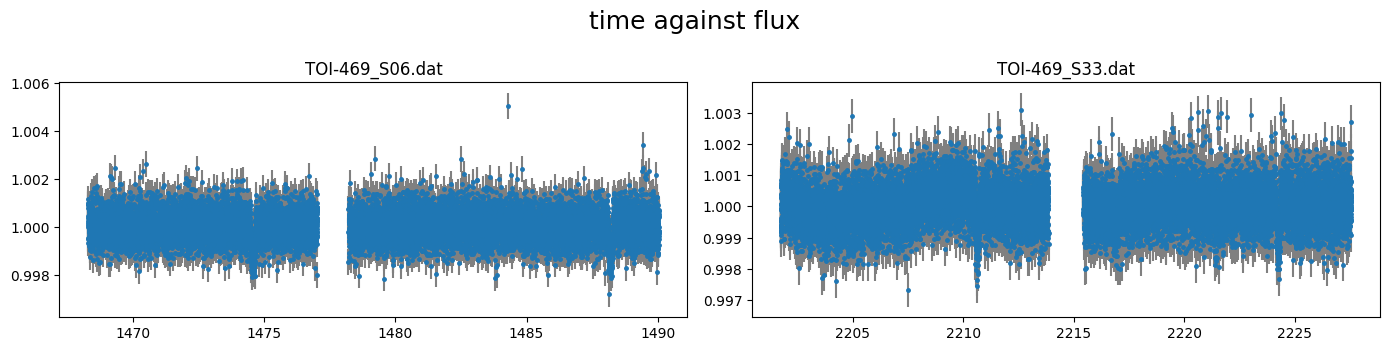

In [5]:
lc_obj.plot()

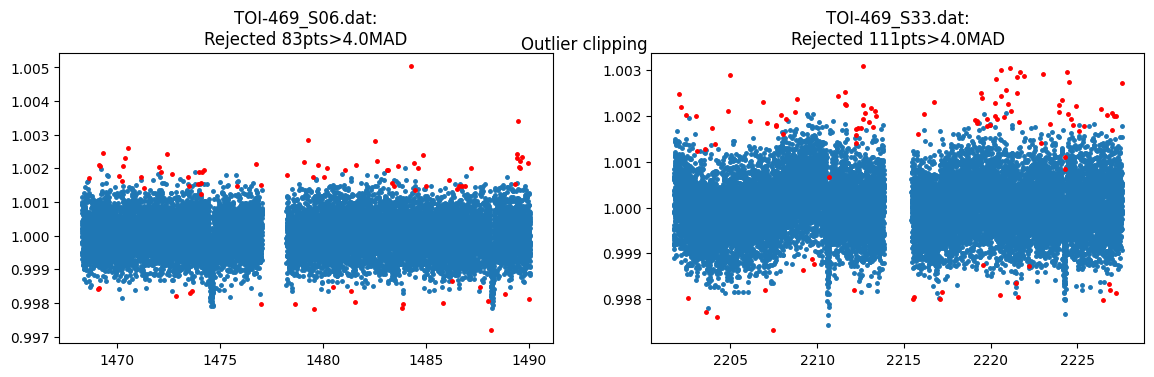

In [6]:
lc_obj.clip_outliers(clip=4, width=15, niter=1, show_plot=True)

#### Planet parameters

In [7]:
traocc_pars =dict( T_0            = [(2210.4,2210.634,2210.8),    #planet 1
                                     (2207.1,2207.252,2207.5),    #planet 2
                                     (2225.1,2225.259,2225.5)],   #planet 3
                    Period        = [(13.6,13.63,13.7),
                                     (3.5,3.5379,3.6), 
                                     (6.4,6.42975,6.5)],
                    Impact_para   = [(0, 0.28, 1), 
                                     (0, 0.617,1), 
                                     (0,0.273,1)],
                    RpRs          = [(0.001,0.0321,0.1), 
                                     (0.001,0.0146,0.1), 
                                     (0.001,0.0127,0.1)],
                    rho_star      = (1.42,0.1),     #same for all planets
                    K             = (0,2,10)        #m/s - unit of rv data
                  )


In [8]:
lc_obj.planet_parameters(**traocc_pars)

# ============ Planet parameters (Transit and RV) setup ========================================================== 
name                	fit 	prior                              	note
[rho_star]/Duration 	y   	N(1.42,0.1)                        	#choice in []|unit(gcm^-3/days)
--------repeat this line & params below for multisystem, adding '_planet_number' to the names e.g RpRs_1 for planet 1, ...
RpRs_1              	y   	U(0.001,0.0321,0.1)                	#range[-0.5,0.5]
Impact_para_1       	y   	U(0,0.28,1)                        	#range[0,2]
T_0_1               	y   	U(2210.4,2210.634,2210.8)          	#unit(days)
Period_1            	y   	U(13.6,13.63,13.7)                 	#range[0,inf]days
Eccentricity_1      	n   	F(0)                               	#range[0,1]
omega_1             	n   	F(90)                              	#range[0,360]deg
K_1                 	y   	U(0,2,10)                          	#unit(same as RVdata)
------------
RpRs_2              	y   	U(0.001,0.0146,0.

#### limb darkening

In [9]:
q1,q2 = lc_obj.get_LDs(Teff           = (5289,69),
                       logg           = (4.24,0.13),
                       Z              = (0.24,0.05),
                       filter_names   = ["TESS"], 
                       use_result     = True)

# lc_obj.limb_darkening(q1=q1,q2=q2)

TESS      (T): q1=(0.354, 0.016), q2=(0.4024, 0.012)

Setting-up limb-darkening priors from LDTk result
# ============ Limb darkening setup ============================================================================= 
filters	fit	q1               	q2               
T      	y  	N(0.354,0.016)   	N(0.4024,0.012)  


#### add GP

model GP as the only baseline model

get estimate rms of each light curve to use as starting point of gp amplitude

In [10]:
np.array(lc_obj._rms_estimate)*1e6

array([547.99430013, 567.6340518 ])

In [11]:
lc_obj.add_GP(lc_list     = "all",
              par         = ["col0","col0"],
              kernel      = "mat32",
              amplitude   = (1,100, 700),    #in ppm, uses log-uniform prior    
              lengthscale = (0.1,1, 20),    #in days, also log-uniform prior
              gp_pck      = "ce"
             )

# ============ Input lightcurves, filters baseline function =======================================================
name            flt 𝜆_𝜇m |Ssmp ClipOutliers scl_col |off col0 col3 col4 col5 col6 col7 col8|sin id GP spline         
TOI-469_S06.dat T   0.8  |None c1:W15C4n1   None    |  n    0    0    0    0    0    0    0|n    1 ce None           
TOI-469_S33.dat T   0.8  |None c1:W15C4n1   None    |  n    0    0    0    0    0    0    0|n    2 ce None           
# ============ Photometry GP properties ===========================================================================
name            par1 kern1 Amplitude1_ppm     length_scale      |op| par2 kern2 Amplitude2_ppm     length_scale2    
TOI-469_S06.dat col0 mat32 LU(1,100,700)      LU(0.1,1,20)      |--| None None  None               None              
TOI-469_S33.dat col0 mat32 LU(1,100,700)      LU(0.1,1,20)      |--| None None  None               None              


### Setup RV

In [12]:
import CONAN3
import matplotlib.pyplot as plt
path = "data/"


In [13]:
rv_list = ["TOI469rv1.dat", "TOI469rv2.dat" ]
rv_obj = CONAN3.load_rvs(file_list     = rv_list, 
                         data_filepath = path,
                         nplanet       = 3,
                         rv_unit       = "m/s",
                         lc_obj        = lc_obj
                        )
rv_obj

# ============ Input RV curves, baseline function, GP, spline,  gamma ============================================ 
name          RVunit scl_col |col0 col3 col4 col5| sin GP spline_config   | gamma_m/s      
TOI469rv1.dat m/s    None    |   0    0    0    0|   0 n  None            | F(0.0)        
TOI469rv2.dat m/s    None    |   0    0    0    0|   0 n  None            | F(0.0)        


rvs from filepath: data/
3 planet(s)

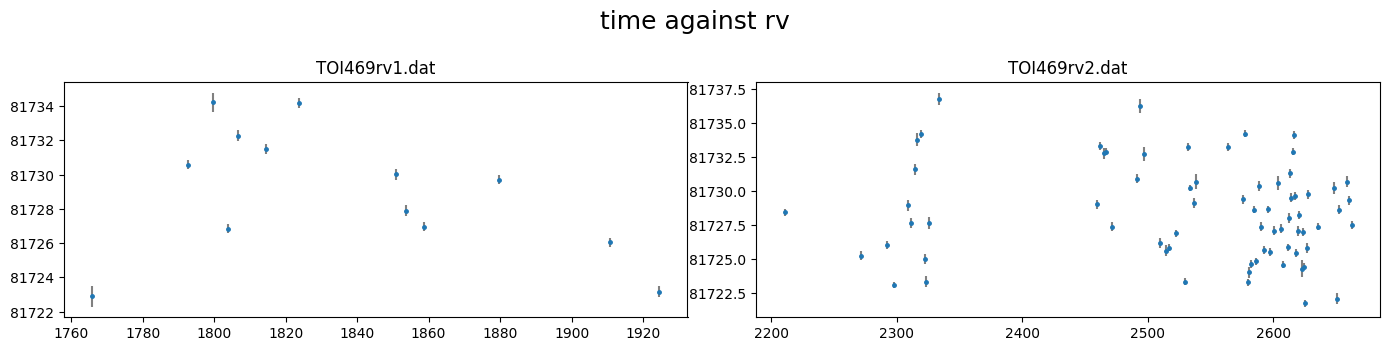

In [14]:
rv_obj.plot()

In [15]:
rv_obj.rv_baseline(gamma = (81728,10))

# ============ Input RV curves, baseline function, GP, spline,  gamma ============================================ 
name          RVunit scl_col |col0 col3 col4 col5| sin GP spline_config   | gamma_m/s      
TOI469rv1.dat m/s    None    |   0    0    0    0|   0 n  None            | N(81728,10)   
TOI469rv2.dat m/s    None    |   0    0    0    0|   0 n  None            | N(81728,10)   


#### add RV GP

Damasso et al. used a quasiperiodic kernel in time to model stellar activity. We will multiply the  exopnential-square (`expsq`)  with a cosine (`cos`) kernel to acheive the quasiperiodic behaviour

In [16]:
rv_obj.add_rvGP(rv_list   = 'same',
              par         = [("col0",        "col0")],
              kernel      = [("cos",         "expsq")],
              amplitude   = [((0.1, 2, 20),    1)],    #in same unit as rv, uses log-uniform prior    
              lengthscale = [((0.01,1, 100), (0.01,1, 60))],    #in days, also log-uniform prior
              operation   = ["*"],
              gp_pck      = "ge"    
             )

# ============ Input RV curves, baseline function, GP, spline,  gamma ============================================ 
name          RVunit scl_col |col0 col3 col4 col5| sin GP spline_config   | gamma_m/s      
TOI469rv1.dat m/s    None    |   0    0    0    0|   0 ge None            | N(81728,10)   
TOI469rv2.dat m/s    None    |   0    0    0    0|   0 ge None            | N(81728,10)   
# ============ RV GP properties ================================================================================== 
name          par1 kern1 Amplitude1         length_scale      |op| par2 kern2 Amplitude2         length_scale2  
same          col0 cos   LU(0.1,2,20)       LU(0.01,1,100)    |* | col0 expsq F(1)               LU(0.01,1,60)   


### Setup Sampling

In [17]:
fit_obj = CONAN3.fit_setup( R_st = (0.993,0.034),
                            M_st = (0.88,0.035))

fit_obj.sampling(n_cpus=10,n_live=1000)

# ============ Stellar input properties ======================================================================
# parameter     value 
Radius_[Rsun]  N(0.993,0.034)
Mass_[Msun]    N(0.88,0.035)
Input_method:[R+rho(Rrho), M+rho(Mrho)]: Rrho
# ============ FIT setup =====================================================================================
Number_steps                              2000 
Number_chains                             64 
Number_of_processes                       10 
Burnin_length                             500 
n_live                                    1000 
force_nlive                               False 
d_logz                                    0.1 
Sampler(emcee/dynesty)                    dynesty 
emcee_move(stretch/demc/snooker)          stretch 
nested_sampling(static/dynamic[pfrac])    static 
leastsq_for_basepar(y/n)                  n 
apply_LCjitter(y/n,list)                  y 
apply_RVjitter(y/n,list)                  y 
LCjitter_loglims(auto/[lo,hi])  

### Export configuration

In [18]:
CONAN3.create_configfile(lc_obj, rv_obj, fit_obj,
                         filename='TOI469_lc_rvconfig.dat')

configuration file saved as TOI469_lc_rvconfig.dat


The config file can be reloaded to create all required objects to perform the fit

In [1]:
import CONAN3
lc_obj, rv_obj, fit_obj = CONAN3.load_configfile('TOI469_lc_rvconfig.dat')

### Perform the fit

finally perform the fitting which is saved to a `results` object that holds the chains of the mcmc and allows subsequent plotting

In [20]:
lc_obj._fit_offset = ["y"]*lc_obj._nphot

In [22]:
result = CONAN3.run_fit(lc_obj,rv_obj, fit_obj, 
                        out_folder="result_TOI469_multi", 
                        rerun_result=True);

Fit result already exists in this folder: result_TOI469_multi
Rerunning CONAN with saved posterior chains to regenerate plots and files...


CONAN fit launched!!!

Setting up photometry arrays ...
Setting up photometry GPs ...
Setting up RV arrays ...
Plotting prior distributions

Plotting initial model(s)
---------------------------

============ Samping started ... (using dynesty [static])======================
No of cpus: 10
No of dimensions: 33
fitting parameters:  ['rho_star' 'T_0_1' 'RpRs_1' 'Impact_para_1' 'Period_1' 'K_1' 'T_0_2'
 'RpRs_2' 'Impact_para_2' 'Period_2' 'K_2' 'T_0_3' 'RpRs_3'
 'Impact_para_3' 'Period_3' 'K_3' 'T_q1' 'T_q2' 'lc1_logjitter'
 'lc2_logjitter' 'rv1_gamma' 'rv1_jitter' 'rv2_gamma' 'rv2_jitter'
 'lc1_off' 'lc2_off' 'GPlc1_Amp1_col0' 'GPlc1_len1_col0' 'GPlc2_Amp1_col0'
 'GPlc2_len1_col0' 'GPrvSame_Amp0_col0' 'GPrvSame_len0_col0'
 'GPrvSame_len1_col0']

Skipping dynesty run. Loading chains from disk

Dynesty chain written to disk as result_TOI469_multi/chai

## Load result

In [1]:
import CONAN3
from CONAN3.utils import bin_data, phase_fold
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
result =CONAN3.load_result("result_TOI469_multi")
result

['lc'] Output files, ['TOI-469_S06_lcout.dat', 'TOI-469_S33_lcout.dat'], loaded into result object
['rv'] Output files, ['TOI469rv1_rvout.dat', 'TOI469rv2_rvout.dat'], loaded into result object


Object containing posterior from emcee/dynesty sampling                 
Parameters in chain are:
	 ['rho_star', 'T_0_1', 'RpRs_1', 'Impact_para_1', 'Period_1', 'K_1', 'T_0_2', 'RpRs_2', 'Impact_para_2', 'Period_2', 'K_2', 'T_0_3', 'RpRs_3', 'Impact_para_3', 'Period_3', 'K_3', 'T_q1', 'T_q2', 'lc1_logjitter', 'lc2_logjitter', 'rv1_gamma', 'rv1_jitter', 'rv2_gamma', 'rv2_jitter', 'lc1_off', 'lc2_off', 'GPlc1_Amp1_col0', 'GPlc1_len1_col0', 'GPlc2_Amp1_col0', 'GPlc2_len1_col0', 'GPrvSame_Amp0_col0', 'GPrvSame_len0_col0', 'GPrvSame_len1_col0']                 

use `plot_chains()`, `plot_burnin_chains()`, `plot_corner()` or `plot_posterior()` methods on selected parameters to visualize results.

### LC

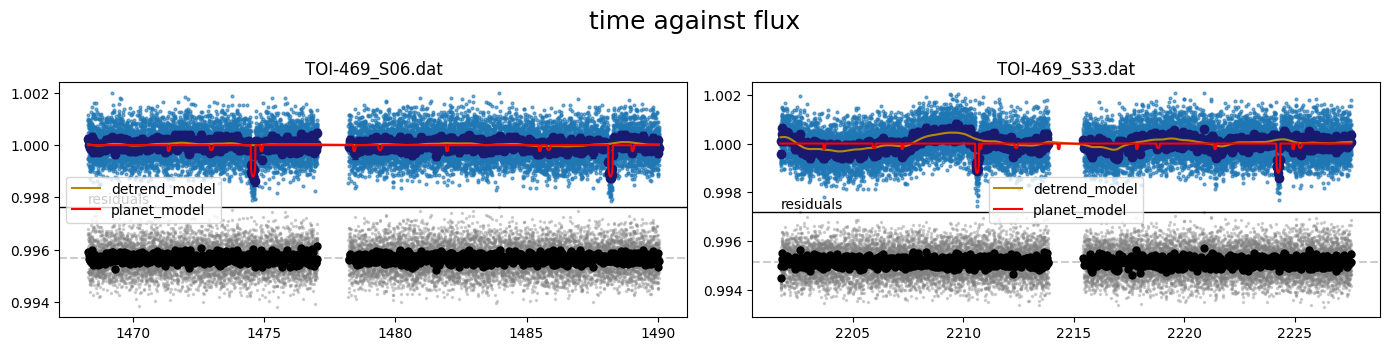

In [3]:
fig = result.lc.plot_bestfit(binsize=0.5/24)

In [4]:
result.lc.names

['TOI-469_S06.dat', 'TOI-469_S33.dat']

In [5]:
#load output data files for the lc fits
lc1data = result.lc.outdata['TOI-469_S06.dat']
lc2data = result.lc.outdata['TOI-469_S33.dat']

lc1data.head()

,time,flux,error,full_mod,base_para,base_sine,base_spl,base_gp,base_total,transit,det_flux,residual,phase_1,phase_2,phase_3
0,1468.276516,1.000369,0.000546,1.000021,1.000028,0.0,1.0,-0.000007,1.000021,1.0,1.000348,0.000348,-0.461651,0.129802,0.268175
1,1468.277905,1.001143,0.000546,1.000021,1.000028,0.0,1.0,-0.000007,1.000021,1.0,1.001122,0.001122,-0.461549,0.130195,0.268391
2,1468.279293,1.000149,0.000546,1.000021,1.000028,0.0,1.0,-0.000007,1.000021,1.0,1.000129,0.000129,-0.461447,0.130587,0.268607
3,1468.280682,0.999294,0.000545,1.000021,1.000028,0.0,1.0,-0.000007,1.000021,1.0,0.999274,-0.000726,-0.461346,0.130980,0.268823
4,1468.282071,0.999478,0.000546,1.000021,1.000028,0.0,1.0,-0.000007,1.000021,1.0,0.999458,-0.000542,-0.461244,0.131373,0.269039


In [6]:
# join two outputs in a single dataframe (so we can plot the model across the times)
lcdata = pd.concat([lc1data,lc2data])
lcdata.head()

,time,flux,error,full_mod,base_para,base_sine,base_spl,base_gp,base_total,transit,det_flux,residual,phase_1,phase_2,phase_3
0,1468.276516,1.000369,0.000546,1.000021,1.000028,0.0,1.0,-0.000007,1.000021,1.0,1.000348,0.000348,-0.461651,0.129802,0.268175
1,1468.277905,1.001143,0.000546,1.000021,1.000028,0.0,1.0,-0.000007,1.000021,1.0,1.001122,0.001122,-0.461549,0.130195,0.268391
2,1468.279293,1.000149,0.000546,1.000021,1.000028,0.0,1.0,-0.000007,1.000021,1.0,1.000129,0.000129,-0.461447,0.130587,0.268607
3,1468.280682,0.999294,0.000545,1.000021,1.000028,0.0,1.0,-0.000007,1.000021,1.0,0.999274,-0.000726,-0.461346,0.130980,0.268823
4,1468.282071,0.999478,0.000546,1.000021,1.000028,0.0,1.0,-0.000007,1.000021,1.0,0.999458,-0.000542,-0.461244,0.131373,0.269039


In [7]:
# evaluate the transit model across both datasets and get individual planet's transit model
lcmod = result.lc.evaluate(time =np.array(lcdata["time"]), return_std=True,nsamp=500)
print(vars(lcmod).keys())

dict_keys(['time', 'planet_model', 'components', 'sigma_low', 'sigma_high'])


#### Individual planet components

In [8]:
lc_comp = lcmod.components
lc_comp.keys()

dict_keys(['pl_1', 'pl_2', 'pl_3'])

##### planet 1

In [9]:
%matplotlib inline

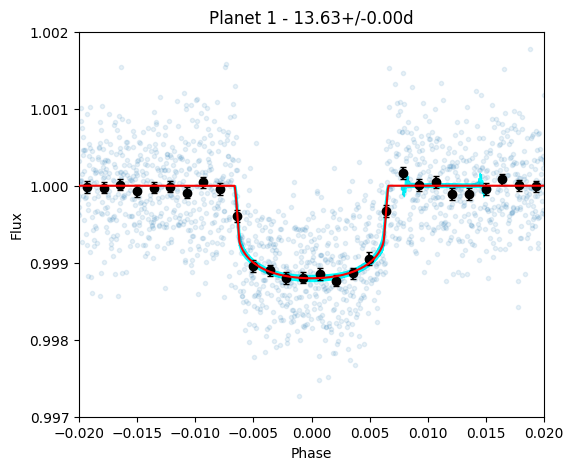

In [10]:
srt = np.argsort(lcdata["phase_1"])
subtract_signal = (lc_comp["pl_2"]-1) + (lc_comp["pl_3"]-1)
lc_pl1 = (lcdata["det_flux"]-subtract_signal)

plt.figure(figsize=(6,5))
plt.title(f"Planet 1 - {result.params_dict['Period_1']:.2f}d")

plt.plot(lcdata["phase_1"], lc_pl1,".",alpha=0.1)

ph_bin, f_bin, e_bin = bin_data(t   = np.array(lcdata["phase_1"])[srt], 
                                f   = np.array(lc_pl1)[srt], 
                                err = np.array(lcdata["error"])[srt],
                                bins = 700)
plt.errorbar(ph_bin, f_bin, e_bin, fmt="ko",capsize=2)

plt.plot(np.array(lcdata["phase_1"])[srt], lc_comp["pl_1"][srt],"r",zorder=3)

plt.fill_between(   np.array(lcdata["phase_1"])[srt],
                    (lcmod.sigma_low - subtract_signal)[srt], 
                    (lcmod.sigma_high - subtract_signal)[srt], 
                    color="cyan"
                )


plt.ylim([0.997,1.002])
plt.xlim([-0.02,0.02])
plt.ylabel("Flux")
plt.xlabel("Phase");


##### planet 2

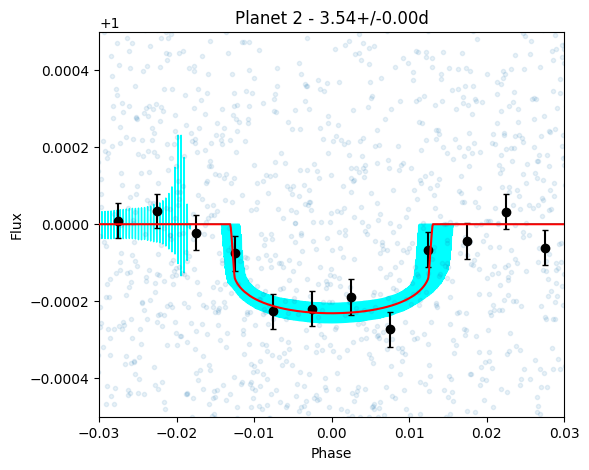

In [11]:
srt = np.argsort(lcdata["phase_2"])
subtract_signal = (lc_comp["pl_1"]-1)+(lc_comp["pl_3"]-1)
lc_pl2 = (lcdata["det_flux"]-subtract_signal)

plt.figure(figsize=(6,5))
plt.title(f"Planet 2 - {result.params_dict['Period_2']:.2f}d")

plt.plot(lcdata["phase_2"], lc_pl2,".",alpha=0.1)

ph_bin, f_bin, e_bin = bin_data(t   = np.array(lcdata["phase_2"])[srt],
                                f   = np.array(lc_pl2)[srt],
                                err = np.array(lcdata["error"])[srt],
                                bins= 200)
plt.errorbar(ph_bin, f_bin, e_bin, fmt="ko",capsize=2)

plt.plot(np.array(lcdata["phase_2"])[srt], lc_comp["pl_2"][srt],"r",zorder=3)

plt.fill_between(   np.array(lcdata["phase_2"])[srt],
                    (lcmod.sigma_low - subtract_signal)[srt], 
                    (lcmod.sigma_high - subtract_signal)[srt], 
                    color="cyan"
                )


plt.ylim([0.9995,1.0005])
plt.xlim([-0.03,0.03])
plt.ylabel("Flux")
plt.xlabel("Phase");

##### planet 3

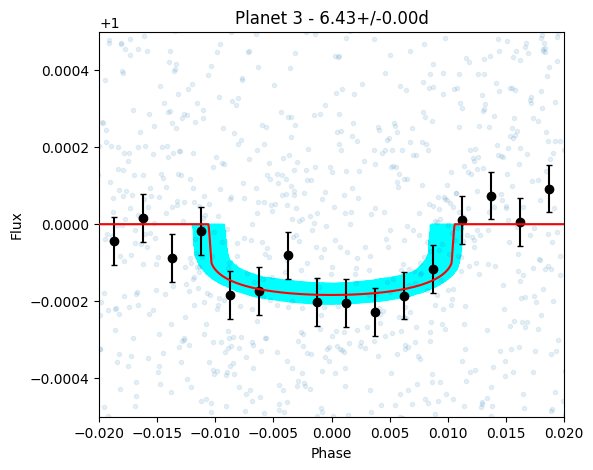

In [12]:
srt = np.argsort(lcdata["phase_3"])
subtract_signal = (lc_comp["pl_1"]-1)+(lc_comp["pl_2"]-1)
lc_pl3 = (lcdata["det_flux"]-subtract_signal)

plt.figure(figsize=(6,5))
plt.title(f"Planet 3 - {result.params_dict['Period_3']:.2f}d")

plt.plot(lcdata["phase_3"], lc_pl3,".",alpha=0.1)

ph_bin, f_bin, e_bin = bin_data(t   = np.array(lcdata["phase_3"])[srt],
                                f   = np.array(lc_pl3)[srt],
                                err = np.array(lcdata["error"])[srt],
                                bins= 400)
plt.errorbar(ph_bin, f_bin, e_bin, fmt="ko",capsize=2)

plt.plot(np.array(lcdata["phase_3"])[srt], lc_comp["pl_3"][srt],"r",zorder=3)

plt.fill_between(   np.array(lcdata["phase_3"])[srt],
                    (lcmod.sigma_low)[srt], 
                    (lcmod.sigma_high)[srt], 
                    color="cyan"
                )


plt.ylim([0.99950,1.0005])
plt.xlim([-0.02,0.02])
plt.xlabel("Phase")
plt.ylabel("Flux");


### RVS

In [13]:
result.rv.names

['TOI469rv1.dat', 'TOI469rv2.dat']

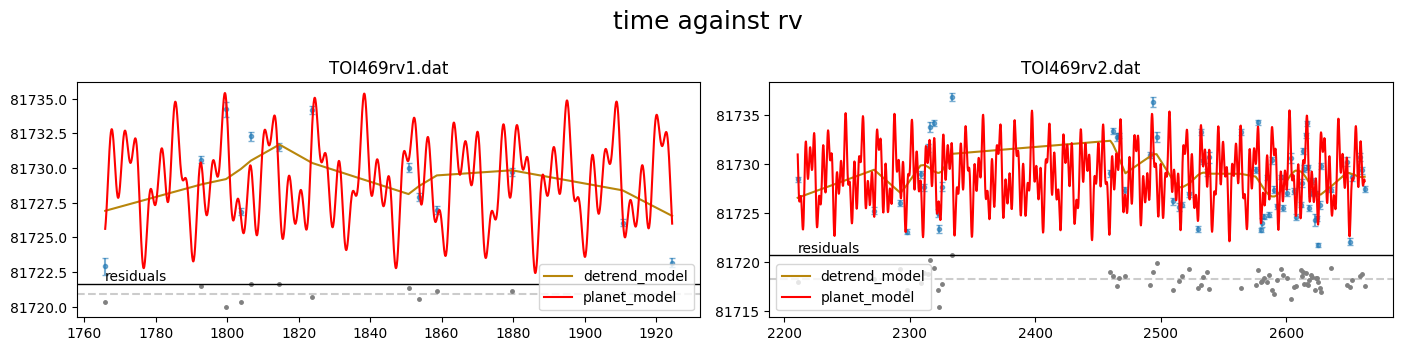

In [14]:
fig = result.rv.plot_bestfit()

In [15]:
#load output data files for the rv fits
rv1data = result.rv.outdata['TOI469rv1.dat']
rv2data = result.rv.outdata['TOI469rv2.dat']

In [16]:
#join two outputs in a single dataframe
rvdata = pd.concat([rv1data,rv2data])
rvdata.head()

,time,RV,error,full_mod,base_para,base_spl,base_gp,base_total,Rvmodel,det_RV,gamma,residual,phase_1,phase_2,phase_3
0,1765.880033,81722.91,0.818461,81723.489042,0.0,0.0,-2.120525,81726.909591,-3.420549,-3.999591,81729.030116,-0.579042,0.371466,0.247010,-0.446150
1,1792.789313,81730.59,0.608834,81730.052477,0.0,0.0,-0.215758,81728.814358,1.238119,1.775642,81729.030116,0.537523,0.345614,-0.147121,-0.261004
2,1799.679952,81734.23,0.767710,81735.173659,0.0,0.0,0.166337,81729.196453,5.977206,5.033547,81729.030116,-0.943659,-0.148867,-0.199492,-0.189316
3,1803.799572,81726.85,0.604466,81727.482701,0.0,0.0,0.886114,81729.916230,-2.433529,-3.066230,81729.030116,-0.632701,0.153361,-0.035087,0.451400
4,1806.664396,81732.28,0.642946,81731.585838,0.0,0.0,1.498634,81730.528750,1.057088,1.751250,81729.030116,0.694162,0.363533,-0.225348,-0.103040


In [17]:
# evaluate the RV model across both datasets
rvmod = result.rv.evaluate(time=np.array(rvdata["time"]), return_std=True, nsamp=500)

since the RVs are sparsely sampled, we can evaluate the RV model on a smoother time array across both datasets

In [18]:
t_sm     = np.linspace(rvdata["time"].min(), rvdata["time"].max(), 2000)
rvmod_sm = result.rv.evaluate(file='TOI469rv1.dat',time=t_sm, return_std=True,nsamp=500)

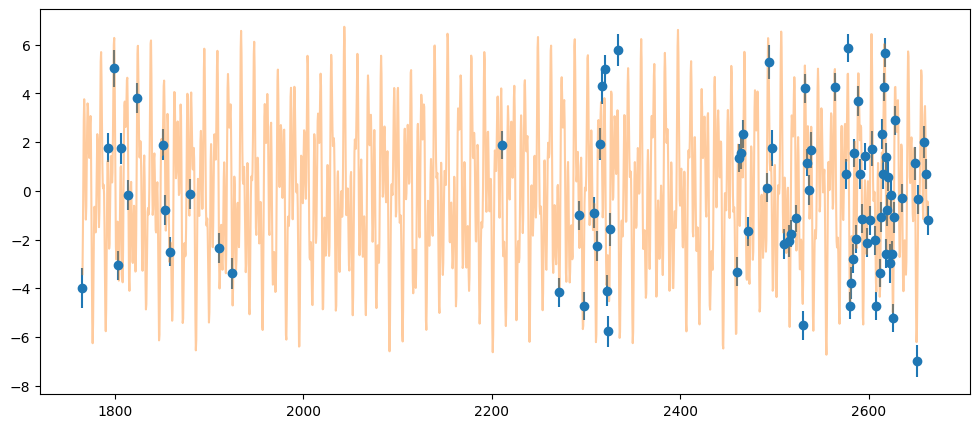

In [19]:
plt.figure(figsize=(12,5))
plt.errorbar(rvdata["time"],rvdata["det_RV"], rvdata["error"],fmt="o")
plt.plot(t_sm, rvmod_sm.planet_model, alpha=0.4)

#### Individual components

In [20]:
rv_comp    = rvmod.components
rv_comp_sm = rvmod_sm.components

##### planet 1

Text(0, 0.5, 'RV [m/s]')

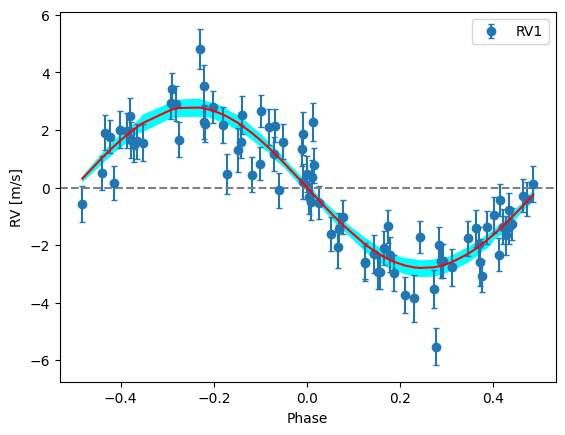

In [21]:
srt = np.argsort(rvdata["phase_1"])
subtract_signal = rv_comp["pl_2"]+rv_comp["pl_3"]

plt.errorbar(   rvdata["phase_1"],
                (rvdata["det_RV"]-subtract_signal), 
                rvdata["error"], 
                fmt="o",capsize=2,
                label="RV1")

plt.plot(np.array(rvdata["phase_1"])[srt], rv_comp["pl_1"][srt],"r",zorder=4)

plt.fill_between(   np.array(rvdata["phase_1"])[srt],
                    (rvmod.sigma_low - subtract_signal)[srt], 
                    (rvmod.sigma_high-subtract_signal)[srt], 
                    color="cyan"
                )

plt.legend()
plt.axhline(0,ls="--",c="gray")
plt.xlabel("Phase")
plt.ylabel("RV [m/s]")

##### planet 2

Text(0, 0.5, 'RV [m/s]')

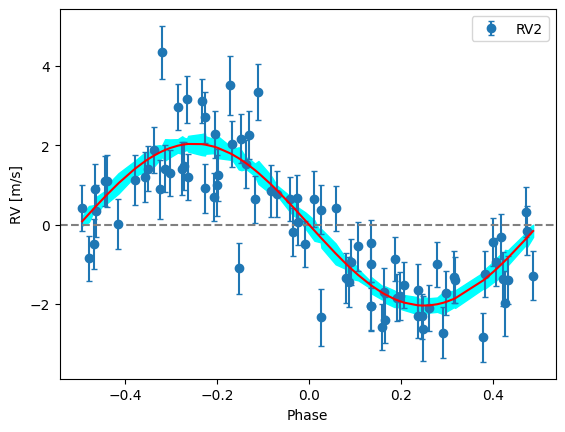

In [22]:
srt = np.argsort(rvdata["phase_2"])
subtract_signal = rv_comp["pl_1"]+rv_comp["pl_3"]

plt.errorbar(   rvdata["phase_2"],
                (rvdata["det_RV"]-subtract_signal),
                rvdata["error"],
                fmt="o",capsize=2,
                label="RV2")

plt.plot(np.array(rvdata["phase_2"])[srt], rv_comp["pl_2"][srt],"r",zorder=4)

plt.fill_between(   np.array(rvdata["phase_2"])[srt],
                    (rvmod.sigma_low - subtract_signal)[srt], 
                    (rvmod.sigma_high-subtract_signal)[srt], 
                    color="cyan"
                )

plt.legend()
plt.axhline(0,ls="--",c="gray")
plt.xlabel("Phase")
plt.ylabel("RV [m/s]")

##### planet 3

Text(0, 0.5, 'RV [m/s]')

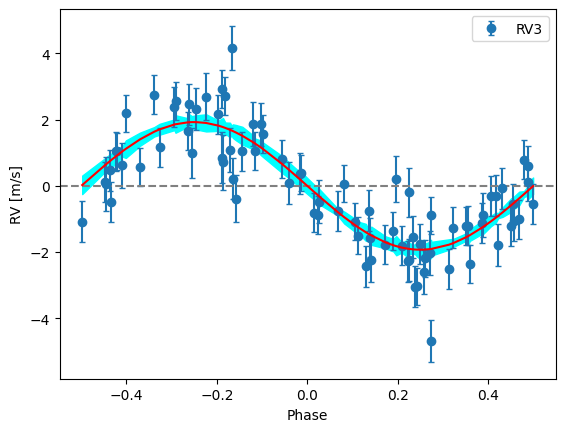

In [23]:
srt = np.argsort(rvdata["phase_3"])
subtract_signal = rv_comp["pl_1"]+rv_comp["pl_2"]

plt.errorbar(   rvdata["phase_3"],
                (rvdata["det_RV"]-subtract_signal),
                rvdata["error"], 
                fmt="o", capsize=2, 
                label="RV3")

plt.plot(np.array(rvdata["phase_3"])[srt], rv_comp["pl_3"][srt],"r", zorder=4)

plt.fill_between(   np.array(rvdata["phase_3"])[srt],
                    (rvmod.sigma_low - subtract_signal)[srt], 
                    (rvmod.sigma_high-subtract_signal)[srt], 
                    color="cyan"
                )

plt.legend()
plt.axhline(0,ls="--",c="gray")
plt.xlabel("Phase")
plt.ylabel("RV [m/s]")